# Importing libraries

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, models
from google.colab import drive

# Mounting drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


# Paths

In [7]:
dataset_dir = "/content/drive/MyDrive/Dataset of CNN Model"  # inside: brain/ , skin/
img_size = (128, 128)
batch_size = 32

# Data Generators

In [8]:
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)

Found 2016 images belonging to 2 classes.
Found 504 images belonging to 2 classes.


# Label Mapping

In [9]:
labels = {v: k for k, v in train_gen.class_indices.items()}
np.save("organ_labels.npy", labels)
print("Label mapping saved:", labels)

Label mapping saved: {0: 'Brain Tumor', 1: 'Skin Cancer'}


# Build CNN Model

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")   # binary output (Brain vs Skin)
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [11]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

model.save("organ_classifier.h5")
print("Model saved as organ_classifier.h5")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 725s 11s/step - accuracy: 0.9297 - loss: 0.1335 - val_accuracy: 0.9881 - val_loss: 0.0242
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.9989 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 4.6723e-05
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.9860 - loss: 0.0974 - val_accuracy: 0.9980 - val_loss: 0.0017
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - accuracy: 0.9993 - loss: 0.0081 - val_accuracy: 0.9980 - val_loss: 0.0043
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9980 - val_loss: 0.0030
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 1.0000 - loss: 8.5504e-04 - val_accuracy: 1.0000 - val_loss: 3.3050e-04
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.9978 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 1.0588e-07
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 1.0000 - loss: 1.

Model saved as organ_classifier.h5


# Predict a single image

In [13]:
def predict_single(img_path):
    labels = np.load("organ_labels.npy", allow_pickle=True).item()
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0][0]
    result = labels[0] if pred < 0.5 else labels[1]

    plt.imshow(load_img(img_path, target_size=img_size))
    plt.title(f"Predicted: {result}")
    plt.axis("off")
    plt.show()

    return result

# Predict all images in a folder

In [14]:
def predict_folder(folder_path):
    for file in os.listdir(folder_path):
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(folder_path, file)
            result = predict_single(img_path)
            print(f"{file} -> {result}")

# Usage

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


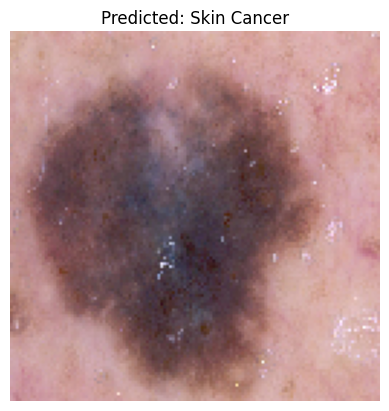

'Skin Cancer'

In [15]:
predict_single("/content/ISIC_0024459.jpg")
# predict_folder("/content/test_images")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


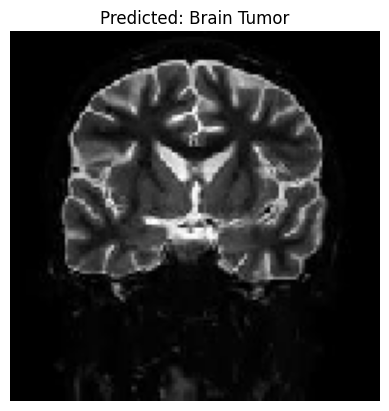

'Brain Tumor'

In [16]:
predict_single("/content/Tr-no_0155.jpg")